In [72]:
from scipy.signal import butter, lfilter
import librosa
import torch
import torchaudio
import matplotlib.pyplot as plt

In [78]:
filename = r"C:\Users\jiyun\Desktop\Jiyu\2020-2021\ESC499 - Thesis\WaveNet\magnatagatune\data\twinkle\twinkle-piano.mp3"
# filename = r"C:\Users\jiyun\Desktop\Jiyu\2020-2021\ESC499 - Thesis\WaveNet\magnatagatune\data\24_preludes_for_solo_piano\jan_hanford-24_preludes_for_solo_piano-01-prelude_no__1_in_f_minor-30-59.mp3"
waveform, sr = librosa.load(filename)

In [67]:
waveform.shape

(1413240,)

In [56]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [57]:
sr

22050

In [80]:
bandpassed = butter_bandpass_filter(waveform, 20, 10000, sr)

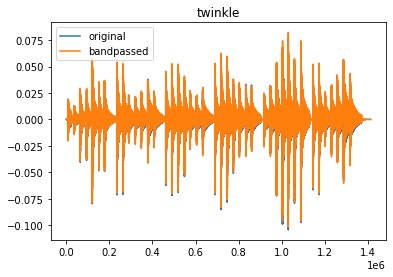

In [79]:
plt.plot(waveform, label="original")
plt.plot(bandpassed, label="bandpassed")
plt.title("twinkle")
plt.legend(loc="upper left")
plt.show()

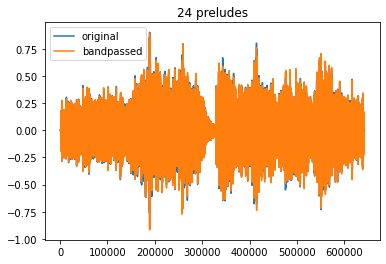

In [47]:
plt.plot(waveform, label="original")
plt.plot(bandpassed, label="bandpassed")
plt.title("24 preludes")
plt.legend(loc="upper left")
plt.show()

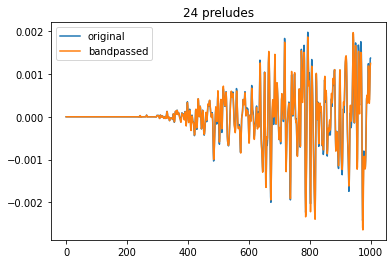

In [48]:
plt.plot(waveform[:1000], label="original")
plt.plot(bandpassed[:1000], label="bandpassed")
plt.title("24 preludes")
plt.legend(loc="upper left")
plt.show()

C:\Users\jiyun\anaconda3\lib\site-packages\torchaudio\functional.py:317: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (80) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  warnings.warn(


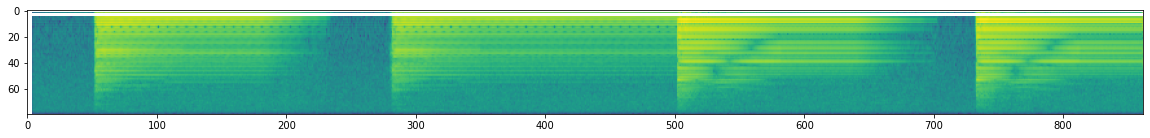

In [81]:
# take a chunk to see better
chunk_size_s = 5
overlap = 0
chunk_size = int(chunk_size_s * sr)

def chunk_waveform(waveform, chunk_size, overlap):
    idx = 0
    # overlap_chunk = 0
    overlap_chunk = int(overlap * chunk_size)
    while idx + chunk_size - overlap_chunk <= len(waveform):
        yield waveform[idx:idx + chunk_size - overlap_chunk]
        idx += chunk_size - overlap_chunk

chunks = torch.FloatTensor(list(chunk_waveform(bandpassed, chunk_size, overlap)))
chunk = chunks[0]

specgram = torchaudio.transforms.MelSpectrogram(n_mels=80, n_fft=256)(chunk.reshape(1,-1))
plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[0,:,:].detach().numpy())
plt.show()

In [82]:
specgram.shape

torch.Size([1, 80, 862])

C:\Users\jiyun\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


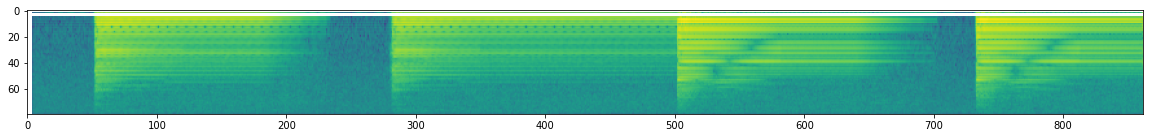

In [83]:
# original
chunks = torch.FloatTensor(list(chunk_waveform(waveform, chunk_size, overlap)))
chunk = chunks[0]

specgram = torchaudio.transforms.MelSpectrogram(n_mels=80, n_fft=256)(chunk.reshape(1,-1))
plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[0,:,:].detach().numpy())
plt.show()